In [2]:
import pandas as pd
import numpy as np

# Data Exploration

##### Create tables

In [3]:
merged_df = pd.read_pickle('data/merged_mean_data.pkl').fillna(0)
merged_df['gender.label'] = merged_df['gender.label'].apply(lambda label: 1 if label == 'male' else 0).apply(pd.to_numeric)

merged_df.head(5)


,"psychopath,empath","punchable,loveable","arrogant,humble","selfish,altruistic","cruel,kind","vengeful,forgiving","quarrelsome,warm","impatient,patient","juvenile,mature","entitled,grateful",...,"outsider,insider","industrial,domestic","complicated,simple","literary,mathematical","slow,fast","careful,brave",race.label,race.confidence,gender.label,gender.confidence
A1,55.5,31.0,51.7,59.7,63.1,60.1,45.0,48.6,73.3,34.7,...,60.5,29.6,52.7,65.8,53.0,57.8,asian,1.0,1,1.00
A4,16.9,18.9,20.9,29.4,26.2,27.5,25.1,61.8,74.4,7.7,...,41.7,15.4,30.3,87.7,63.3,26.2,white,1.0,1,0.94
AD1,75.3,51.9,45.9,61.5,68.2,64.9,40.4,55.0,72.8,38.0,...,44.1,61.8,44.0,76.0,65.2,23.8,white,1.0,1,0.89
AD7,44.8,38.1,29.0,40.8,77.5,73.0,64.4,46.0,14.8,32.0,...,12.1,82.1,44.1,24.8,18.9,37.1,white,1.0,1,1.00
AHX1,48.6,57.0,33.9,25.0,48.1,60.2,19.7,28.7,22.5,31.5,...,21.8,47.2,22.2,25.0,66.5,60.8,white,1.0,1,0.92


In [4]:
merged_df.shape

(858, 364)

##### Standardize index names

In [5]:
traits_columns = list(filter(lambda col: ',' in col, merged_df.columns.values))

print('Total Dual Traits:', len(traits_columns))

Total Dual Traits: 360


In [6]:
from sklearn.model_selection import KFold, train_test_split

def evaluate_classifier(label, model, classifier, X, y):
    
    k_fold = KFold(n_splits=5)
    
    total_accuracy = 0
    total_tries = 0
    
    for train_index, test_index in k_fold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        classifier.fit(X_train, y_train)

        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred, normalize=True)

        total_accuracy += accuracy
        total_tries += 1
        
    print(f'{label} Accuracy using {model}:', round(total_accuracy / total_tries, 4))


# Predict the Gender

In [13]:
from sklearn.linear_model import LassoCV, Ridge, RidgeClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# For gender prediction, we remove the 'masculine' label
gender_columns = list(filter(lambda trait: 'masculine' not in trait, traits_columns))
X = merged_df[gender_columns].values
y = merged_df['gender.label'].values


evaluate_classifier('Gender', 'Random Forest 2^8 estimators, Gini', RandomForestClassifier(n_estimators=2**8, criterion='gini'), X, y)
evaluate_classifier('Gender', 'Random Forest 2^8 estimators, Entropy', RandomForestClassifier(n_estimators=2**8, criterion='entropy'), X, y)
evaluate_classifier('Gender', 'Logistic Regression L2', LogisticRegression(penalty='l2', max_iter=5000), X, y)
evaluate_classifier('Gender', 'Ridge Classifier, alpha 0.1', RidgeClassifier(alpha=0.1), X, y)
evaluate_classifier('Gender', 'Decision Tree, vanilla ', DecisionTreeClassifier(), X, y)


Gender Accuracy using Random Forest 2^8 estimators, Gini: 0.8963
Gender Accuracy using Random Forest 2^8 estimators, Entropy: 0.9033
Gender Accuracy using Logistic Regression L2: 0.9651
Gender Accuracy using Ridge Classifier, alpha 0.1: 0.9616
Gender Accuracy using Decision Tree, vanilla : 0.8625


In [14]:
merged_df['gender.label'].value_counts()

1    577
0    281
Name: gender.label, dtype: int64

# Predict the Race

In [15]:
from sklearn.linear_model import LassoCV, Ridge, RidgeClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder

# For gender prediction, we remove the 'masculine' label
race_columns = list(traits_columns)
race_columns.append('gender.label')

y_encoder = LabelEncoder()

X = merged_df[race_columns].values
y = y_encoder.fit_transform(merged_df['race.label'])

evaluate_classifier('Race', 'Random Forest 2^8 estimators, Gini', RandomForestClassifier(n_estimators=2**8, criterion='gini'), X, y)
evaluate_classifier('Race', 'Random Forest 2^8 estimators, Entropy', RandomForestClassifier(n_estimators=2**8, criterion='entropy'), X, y)
evaluate_classifier('Race', 'Logistic Regression L2, 10000 iterations', LogisticRegression(penalty='l2', max_iter=10000), X, y)
evaluate_classifier('Race', 'Ridge Classifier, alpha 0.1 ', RidgeClassifier(alpha=0.1), X, y)
evaluate_classifier('Race', 'Decision Tree, vanilla ', DecisionTreeClassifier(), X, y)


Race Accuracy using Random Forest 2^8 estimators, Gini: 0.8519
Race Accuracy using Random Forest 2^8 estimators, Entropy: 0.8543
Race Accuracy using Logistic Regression L2, 10000 iterations: 0.7645
Race Accuracy using Ridge Classifier, alpha 0.1 : 0.7669
Race Accuracy using Decision Tree, vanilla : 0.7401


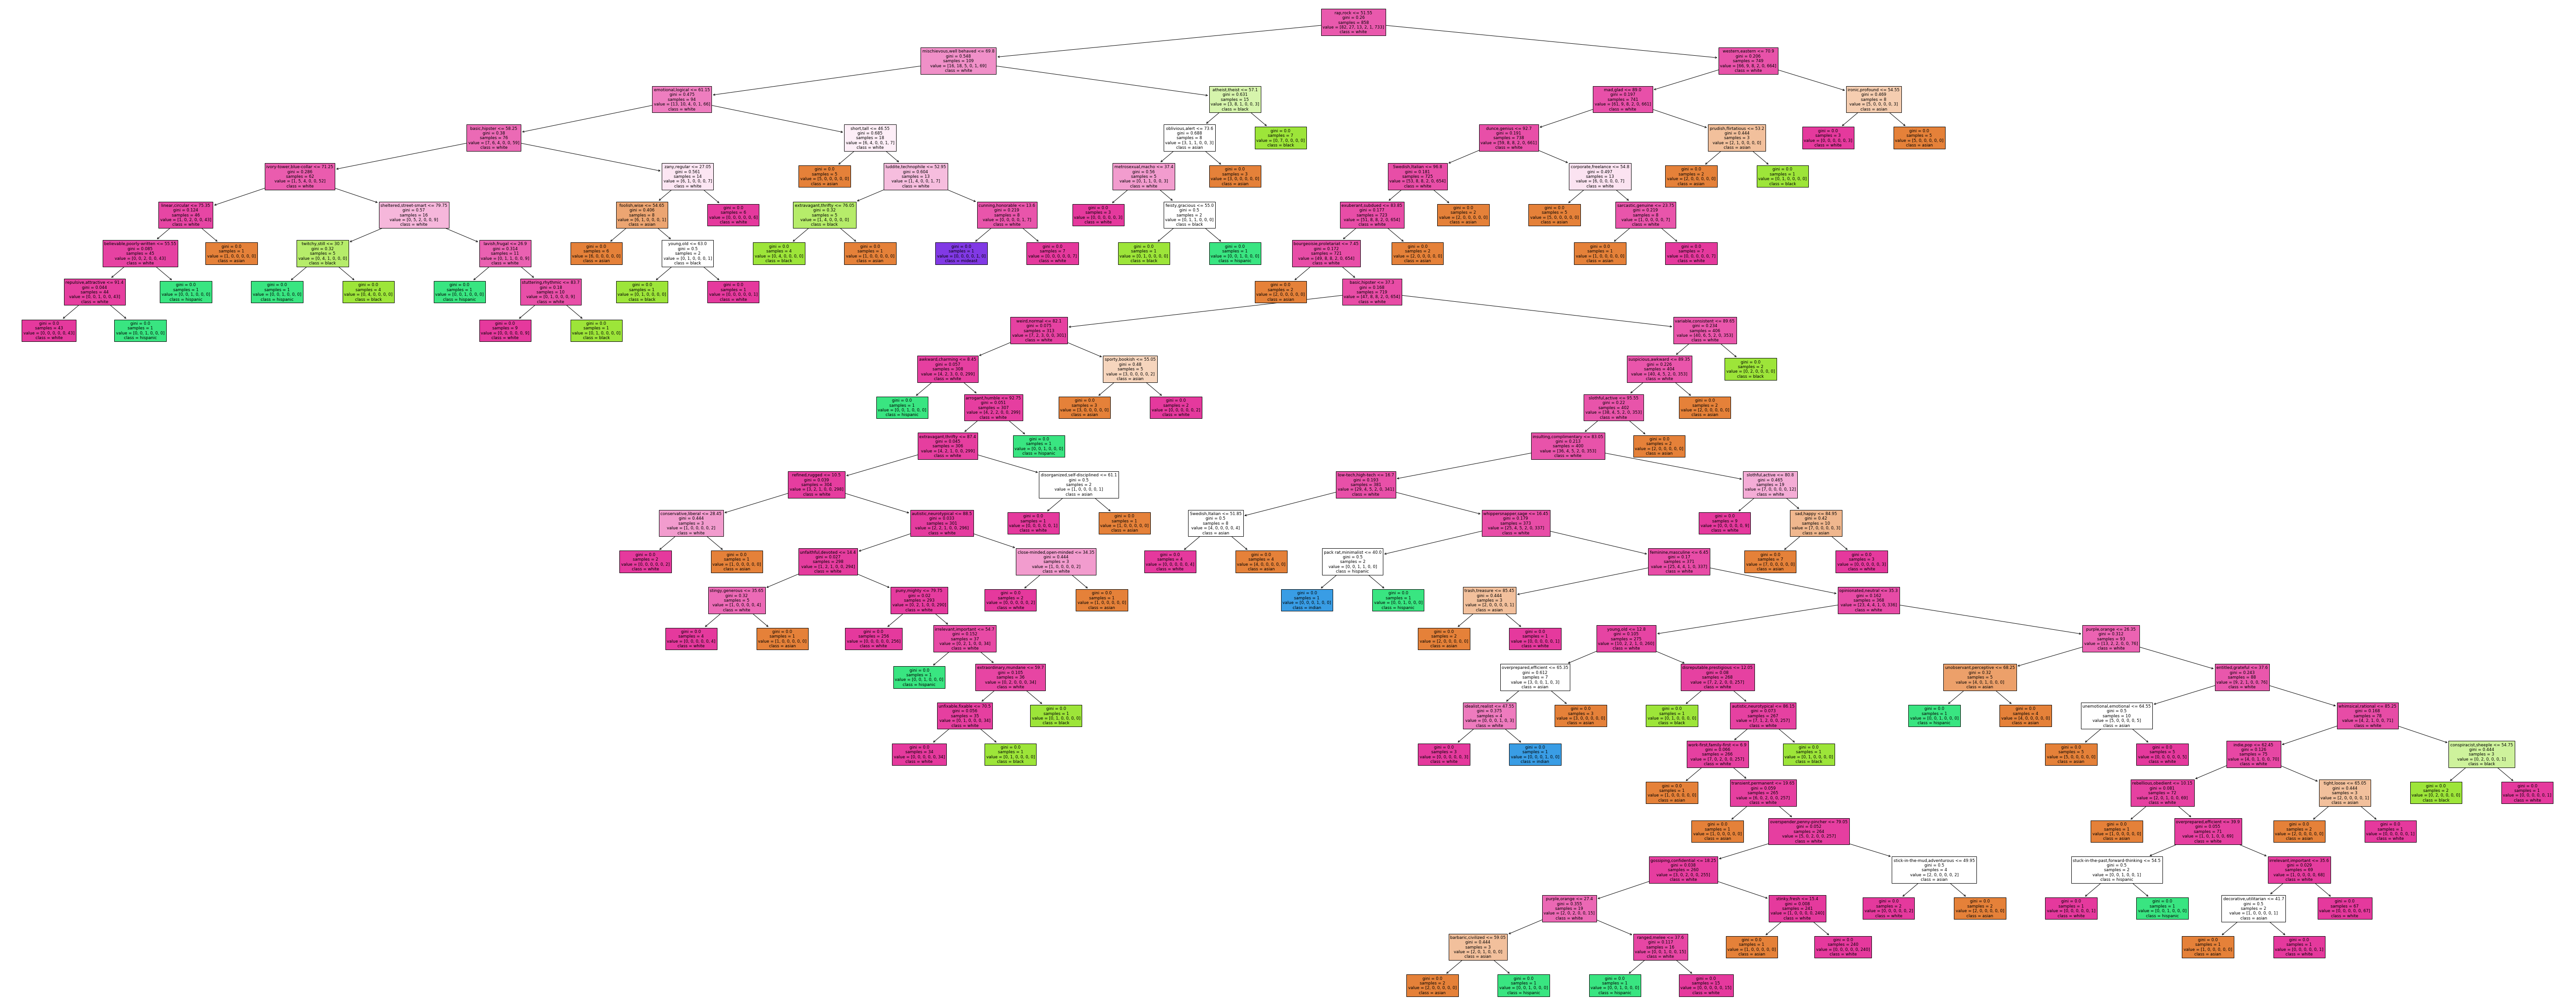

In [16]:
from sklearn import tree
from matplotlib import pyplot as plt

decision_tree_classifier = DecisionTreeClassifier(criterion='gini')  
decision_tree_classifier.fit(X, y)



fig = plt.figure(figsize=(100,40))
_ = tree.plot_tree(decision_tree_classifier, 
                   feature_names=race_columns,  
                   class_names=y_encoder.classes_,
                   filled=True,
                   label='all')

In [17]:
merged_df['race.label'].value_counts()['white'] / len(merged_df['race.label'])

0.8543123543123543

In [18]:
merged_df['race.label'].value_counts()

white       733
asian        82
black        27
hispanic     13
indian        2
mideast       1
Name: race.label, dtype: int64

In [19]:
len(merged_df['race.label'])

858